In [1]:
from qiskit import *
import numpy as np
from qiskit import IBMQ

token='a2afa69f70955de3c84068e58c44bd81e01740c07ff40db7e9ab824c0da8b9412da7a86e9c453f7f97ecc35fc9f09948ce053cbd9e8213b98feadba15dcc467f'
#IBMQ.enable_account(token)
IBMQ.save_account(token,overwrite=True)
IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-ornl',group='ornl',project='csc517')
#backend = provider.get_backend('ibm_hanoi')
#backend_config = backend.configuration()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

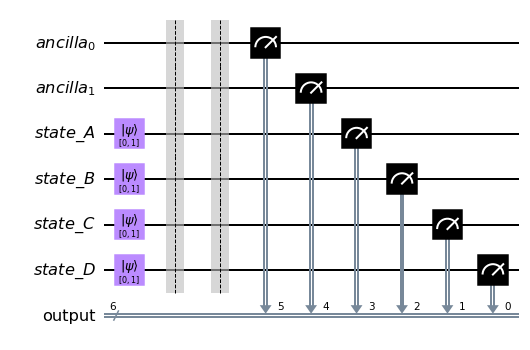

In [10]:

ancilla = QuantumRegister(2,'ancilla')
A = QuantumRegister(1,'state_A')
B = QuantumRegister(1,'state_B')
C = QuantumRegister(1,'state_C')
D = QuantumRegister(1,'state_D')
Meas = ClassicalRegister(6,'output')

circuit = QuantumCircuit(ancilla, A, B, C, D, Meas)
#circuit = QuantumCircuit(ancilla, A, B, C, D)

angle = 0*np.pi/2
for i in range(0,4):
    circuit.initialize([np.sin(i*angle/2),np.cos(i*angle/2)],i+2)


#correcting swap and final gates needed for Bell measurement
circuit.barrier()

circuit.barrier()

#circuit.measure_all()
for i in range(0,6):
    circuit.measure(i,5-i)

circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
shots = 10000
job = execute(circuit,simulator,shots=shots)

result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'001111': 10000}


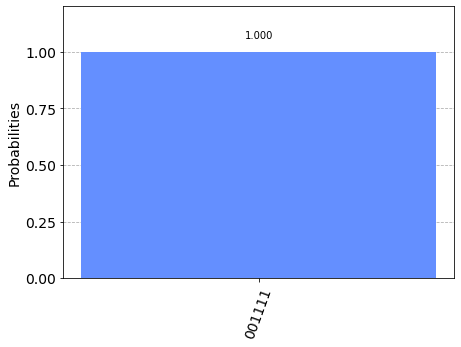

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [45]:
r12 = 1-8*(counts.get('101100',0)+counts.get('101101',0)+counts.get('101110',0)+counts.get('101111',0))/shots
print(f"r_12 = {r12}")
r23 = 1-8*(counts.get('111100',0)+counts.get('111101',0)+counts.get('111110',0)+counts.get('111111',0))/shots
print(f"r_23 = {r23}")
r34 = 1-8*(counts.get('100011',0)+counts.get('100111',0)+counts.get('101011',0)+counts.get('101111',0))/shots
print(f"r_34 = {r34}")
r14 = 1-8*(counts.get('110011',0)+counts.get('110111',0)+counts.get('111011',0)+counts.get('111111',0))/shots
print(f"r_14 = {r14}")

inequality = r12 + r23 + r34 - r14

print(f"r_12 + r_23 + r_34 - r_14 = {inequality}")


r_12 = 0.7303999999999999
r_23 = 0.9152
r_34 = 0.3336
r_14 = 0.38
r_12 + r_23 + r_34 - r_14 = 1.5992000000000002
